## Ahora estudiamos el código asociado al Nodal Line inclinado
Hamiltoniano continuo de bulto para un semimetal topológico de línea inclinaod

\begin{align}
H(\vec{k}) =& a_1(\vec{k}) \sigma_x + a_3(\vec{k})\sigma_z\\
H(\vec{k}) =&(k_x+k_z)\sigma_x +(k_y +  m-\frac{k^2}{2})\sigma_z+m_z\sigma_z
\end{align}
Como se había definido anteriormente a nuestro modelo general de hamiltonianos continuo resulto del caso de p=1 y q=1. Ahora proponemos nuestras funciones para el hamiltoniano de red:
\begin{align}
a_1(\vec{k}) &= \sin k_x + \sin k_z \\
a_3(\vec{k}) &= \sin k_y + \cos k_x + \cos k_y + \cos k_z - m_0
\end{align}

Realizamos el cambio de $\sin$ y $\cos$ por exponenciales
\begin{align}
H(\vec{k}) =\left[\begin{array}{cc}
\frac{1}{2}\bigg(-i(e^{ik_y} - e^{-ik_y}) + e^{ik_x}+e^{-ik_x}+e^{ik_y}+e^{-ik_y}+e^{ik_z}+e^{-ik_z} \bigg) -m_0 & 
\frac{1}{2i}\bigg( e^{ik_x} - e^{-ik_x} + e^{ik_z} - e^{-ik_z}\bigg)\\
 \frac{1}{2i}\bigg(e^{ik_x} - e^{-ik_x} + e^{ik_z} - e^{-ik_z} \bigg) & 
\frac{-1}{2}\bigg(-i(e^{ik_y} - e^{-ik_y}) + e^{ik_x}+e^{-ik_x}+e^{ik_y}+e^{-ik_y}+e^{ik_z}+e^{-ik_z} \bigg) + m_0
\end{array}\right]
\end{align}

In [1]:
# Cargas librerías de python numérico: numpy, scipy, matplotlib
from pylab import *
from scipy.optimize import fsolve
from multiprocessing import Pool
# Cargar librería de pythtb
from pythtb import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook

In [19]:
# Construir el hamiltoniano de red en 
def make_tbsys(a=1 ,m0=2.8 ,mz=0):
    # Vectores de red
    lat = [[a,0,0],[0,a,0],[0,0,a]]

    # Posición de los sitio de la red 
    # en términos de los vectores de re
    orb = [[0,0,0],[1/2,1/2,1/2]]

    # Se genera un modelo de:
    # 2 dimensiones en el espacio real
    # 2 dimensiones en el espacio recíproco
    # con los vectores de red lat
    # con orbitales en los sitios orb
    TSMK11 = tb_model(3,3,lat,orb)

    # Parámetros del modelo:
    # M,t1,t2
    M =  -m0 + mz
    s =  -0.5J
    c =  0.5

    # Establecer las energías on-site
    TSMK11.set_onsite( [ M, -M])

    # Establecer los hoppings a primeros vecinos
    # (hopping, sitio i, sitio j, [vector de red de la celda donde se encuentra j])
    
    ##términos en la diagonal

    TSMK11.set_hop(c,0,0,[1, 0, 0])
    TSMK11.set_hop(s+c,0,0,[0, 1, 0])
    TSMK11.set_hop(c,0,0,[0, 0, 1])
    TSMK11.set_hop(-c,1,1,[1, 0, 0])
    TSMK11.set_hop(-c-s,1,1,[0, 1, 0])    
    TSMK11.set_hop(-c,1,1,[0, 0, 1])
    # términos fuera de la diagonal
    TSMK11.set_hop(s,1,0,[ 1, 0, 0])
    TSMK11.set_hop(-s,1,0,[ -1, 0,0])
    TSMK11.set_hop(s,1,0,[ 0, 0, 1])
    TSMK11.set_hop(-s,1,0,[ 0, 0,-1])
    return TSMK11

In [3]:
# Definimos las funciones donde queremos calcular los nodos
def f(k,k_x,m0=2.8, mz=0):
    suma =  cos(k_x) + cos(k[0]) + cos(k[1]) - m0 +mz
    return [sin(k_x) + sin(k[1]),sin(k[0]) + suma]
# vemos que la funcion f[0] es distinto de a1 porque al querer calcular los nodos es la misma funcio\'n

In [4]:
# creamos una funcio\'n que genere una malla de nodos(E=0, Fermi Energy)
def Nodos(k_x, m0=2.8,mz=0):
    k0 = [[-3, 3],[3, -3]]
    k0.append([-1,1])
    k0.append([1,-1])
    k0.append([-4,4])
    k0.append([4,-4])
    k0.append([-0.1,0.1])
    k0.append([0.1,-0.1])
    k0.append([-0.05,0.05])
    k0.append([0.05,-0.05])
    k0.append([-0.0025,0.0025])
    k0.append([0.0025,-0.0025])    
    mesh = []
    
    for j in range(len(k_x)):
        K = []
        for i in range(len(k0)):
            root = fsolve(f,k0[i],args=(k_x[j],m0,mz))
            flag1 = isclose(f(root,k_x[j],m0,mz),[0,0])
            if flag1[0] == True and flag1[1] == True:
                while abs(root[0]) > pi:
                        if root[0] > 0:
                            root[0]-=2*pi
                        else:
                            root[0]+=2*pi
                while abs(root[1]) > pi:
                        if root[1] > 0:
                            root[1]-=2*pi
                        else:
                            root[1]+=2*pi
                k_y, k_z = root
                k = [k_x[j], k_y, k_z]
                K.append(k)
            
        # Eliminamos las raíces iguales
        for m in range(len(K)):
            l=0
            for n in range(len(K)):
                if m != n and n > m:
                    flag = isclose(K[m],K[n])
                    if flag[1] == True and flag[2] == True:
                        l+=1
            if l == 0:
                mesh.append(K[m])
            
    return array(mesh)

<timed exec>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<IPython.core.display.Javascript object>


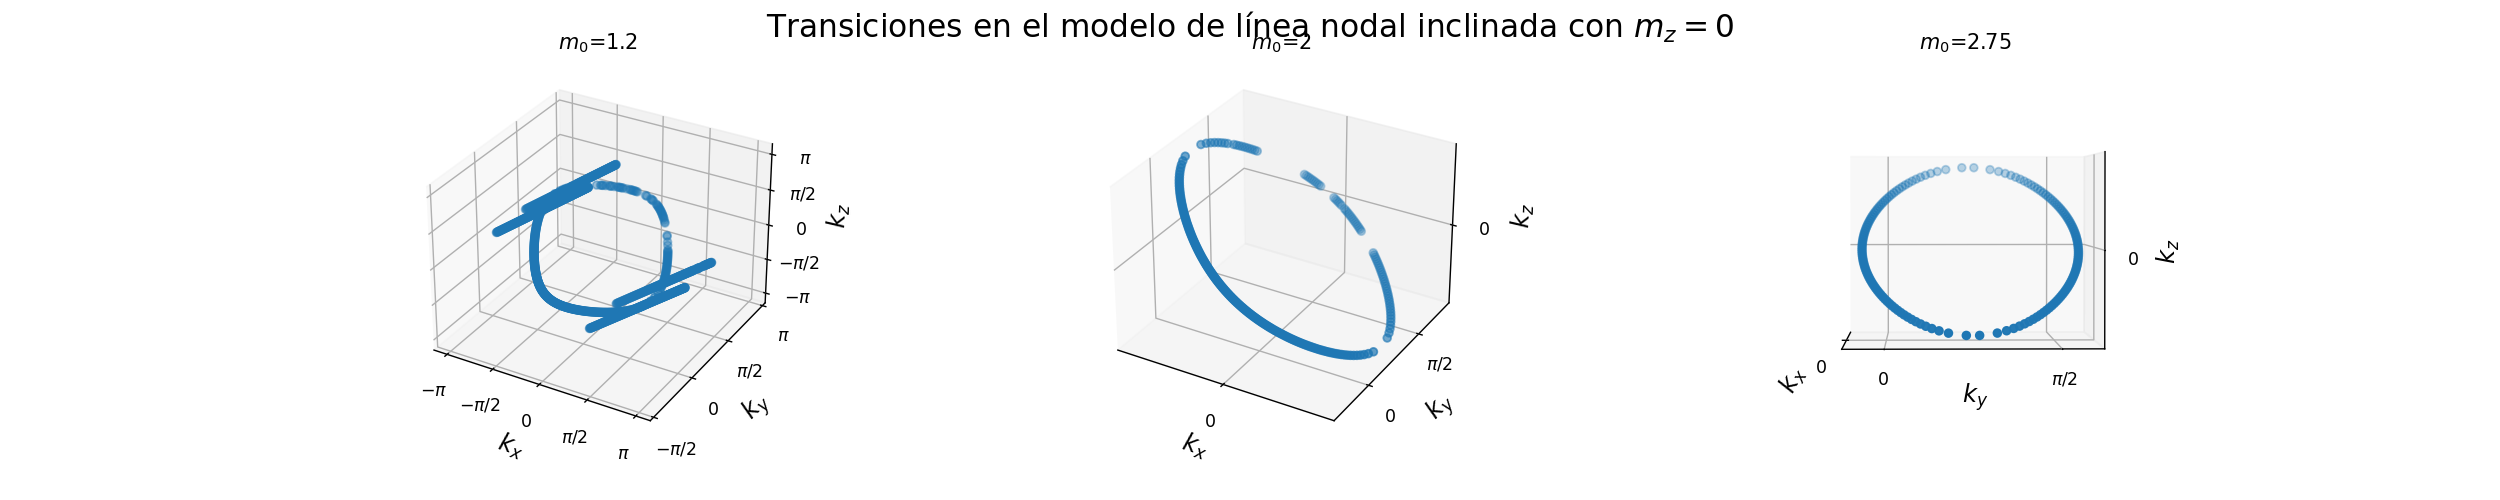

CPU times: user 12.5 s, sys: 457 ms, total: 13 s
Wall time: 8.86 s


In [10]:
%%time
# Exploramos las energías de Fermi del bulto
# Se varía el parametro m_0 asociado al mapeo
NN = 301
mesh1= []
m0 = [1.2,2,2.75]
x = linspace(-pi,pi, NN)
for i in m0:
    mesh1.append(Nodos(x ,i,0))
    
mesh1tb = array(mesh1)
mesh1tb = mesh1tb / (2*pi)

fig = plt.figure(figsize=(20, 4), dpi=100)
fig.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
fig.suptitle('Transiciones en el modelo de línea nodal inclinada con $m_z=0$', fontsize = 18)
#---- First subplot
l = len(m0)
for i in range(l):
    i_1= i + 1
    ax = fig.add_subplot(1, l , i_1, projection='3d')
    ax.scatter( mesh1tb[i].T[0], mesh1tb[i].T[1], mesh1tb[i].T[2])
    ax.set_title(f'$m_0$={m0[i]}')
    ax.set_xlabel('$k_x$', fontsize = 14)
    ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
    ax.set_ylabel('$k_y$', fontsize = 14)
    ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
    ax.set_zlabel('$k_z$', fontsize = 14)
    ax.set_zticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_zticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
fig.savefig("TransicionesTilNLsinnMasa_1.pdf")

/home/eduvela/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/eduvela/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<timed exec>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<IPython.core.display.Javascript object>


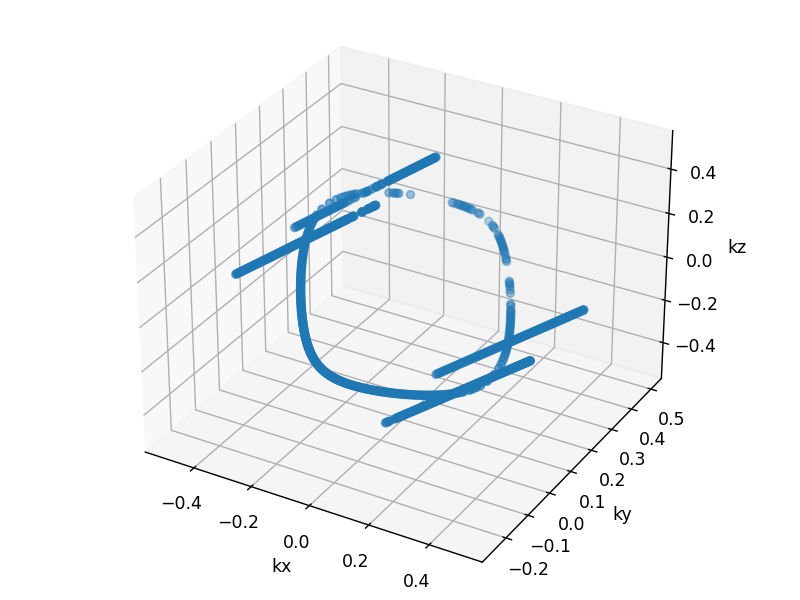

<IPython.core.display.Javascript object>


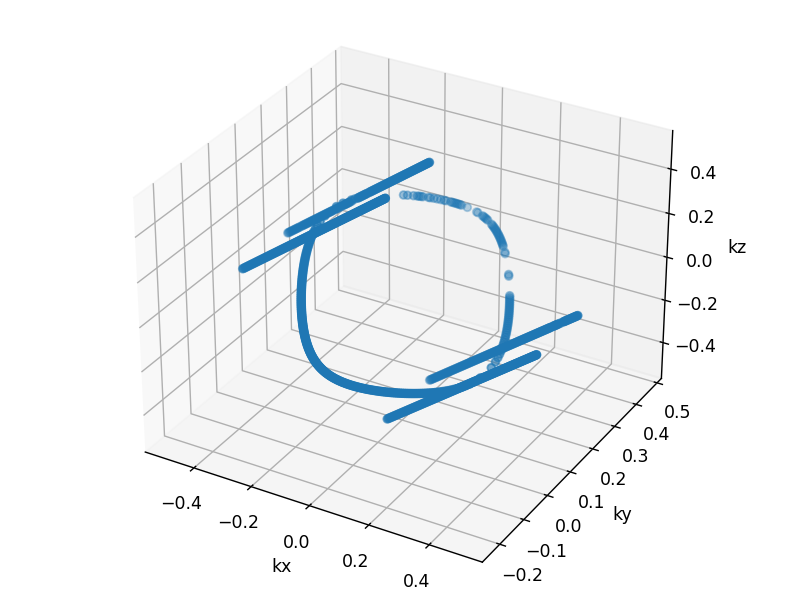

<IPython.core.display.Javascript object>


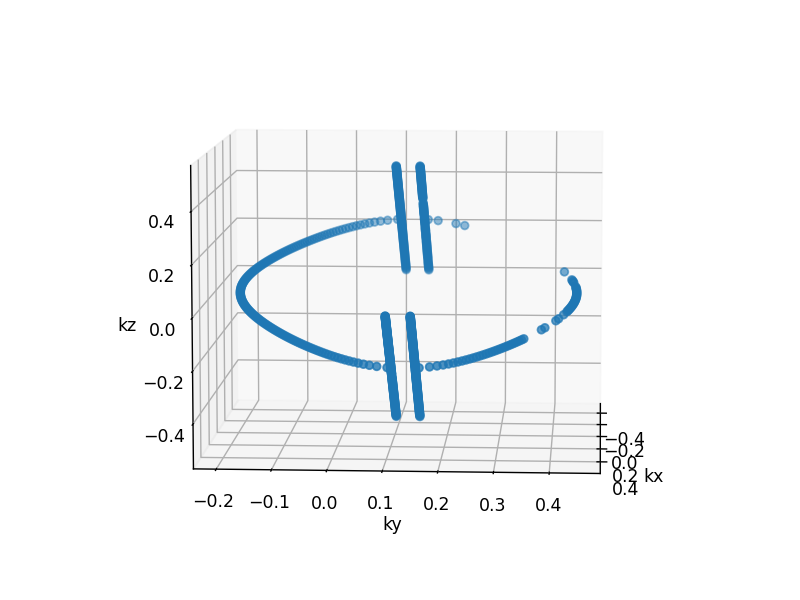

CPU times: user 8.06 s, sys: 506 ms, total: 8.57 s
Wall time: 7.6 s


In [12]:
%%time
# Estados de Fermi en el bulk para m_0=1.4
# Se varía el termino de masa m_z
NN = 300
mesh2= []
mz = [0.4, 0.2, 0]
x = linspace(-pi,pi, NN)
for i in mz:
    mesh2.append(Nodos(x ,1.4,i))
mesh2tb = array(mesh2)
mesh2tb = mesh2tb / (2*pi)

for i in range(len(mesh2tb)):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter( mesh2tb[i].T[0] ,mesh2tb[i].T[1],mesh2tb[i].T[2] )

    ax.set_xlabel('kx')
    ax.set_ylabel('ky')
    ax.set_zlabel('kz')

<timed exec>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<IPython.core.display.Javascript object>


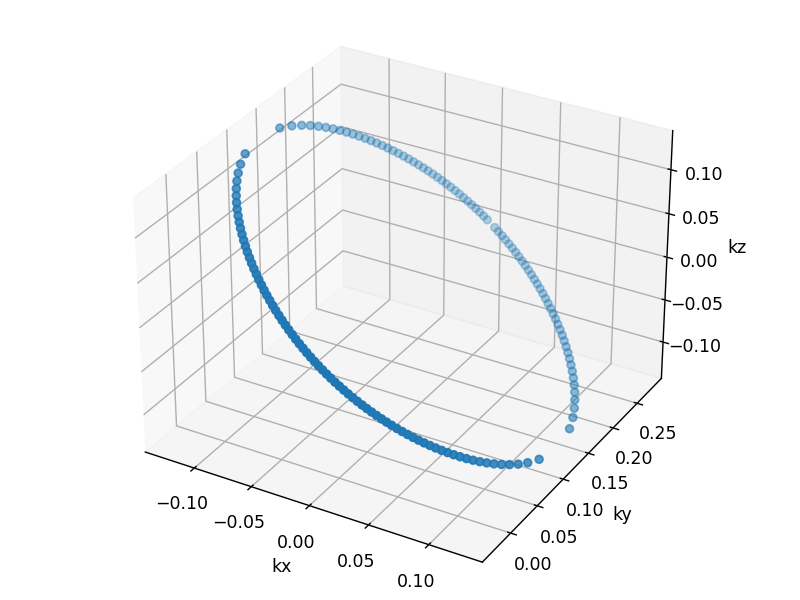

<IPython.core.display.Javascript object>


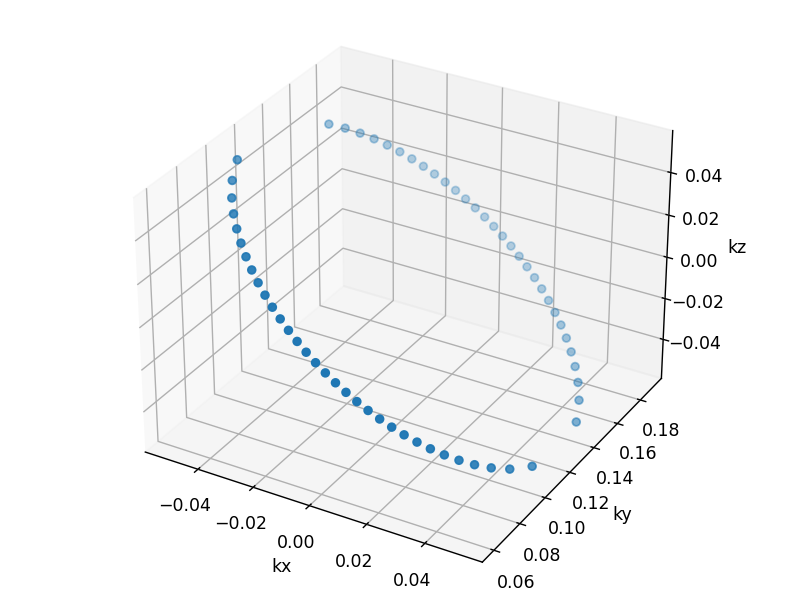

<IPython.core.display.Javascript object>


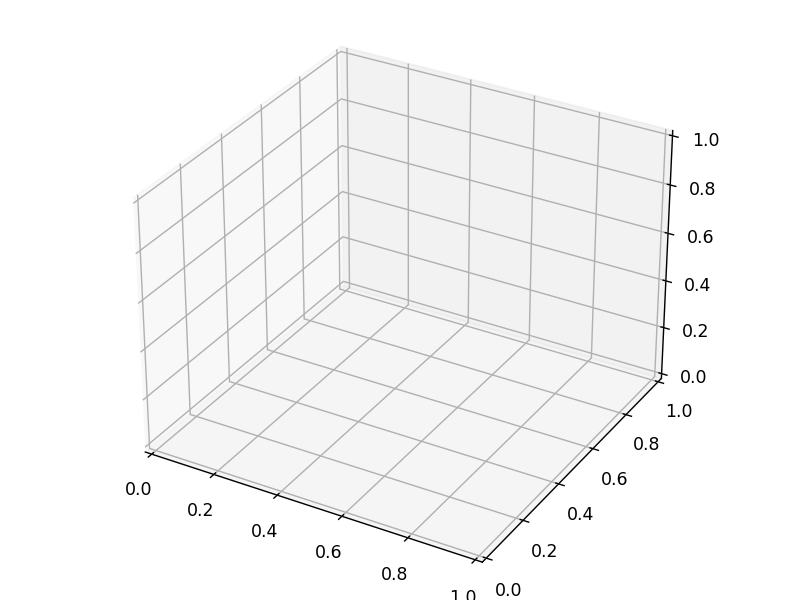

IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
%%time
# Estados de Fermi en el bulk para m_0=2.8
# Se varía el termino de masa m_z
NN = 300
mesh3= []
mz = [0, -0.5, -0.7]
x = linspace(-pi,pi, NN)
for i in range(len(mz)):
    mesh3.append(Nodos(x ,2.8,mz[i]))
mesh3tb = array(mesh3)
mesh3tb = mesh3tb / (2*pi)

for i in range(len(mesh3tb)):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter( mesh3tb[i].T[0] ,mesh3tb[i].T[1],mesh3tb[i].T[2] )

    ax.set_xlabel('kx')
    ax.set_ylabel('ky')
    ax.set_zlabel('kz')

<IPython.core.display.Javascript object>


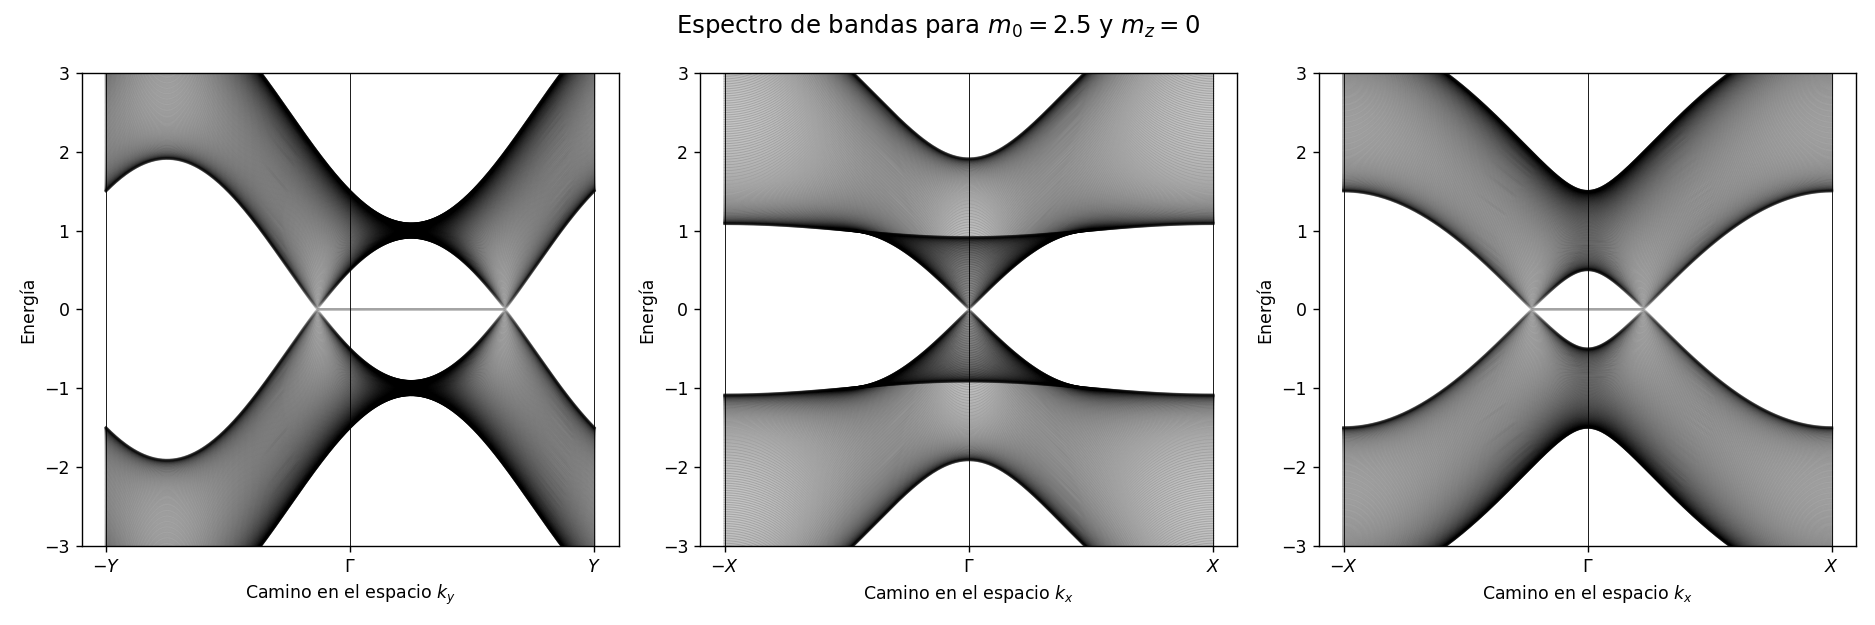

0
1
2
CPU times: user 5.38 s, sys: 888 ms, total: 6.27 s
Wall time: 1min 24s


In [20]:
%%time
proc=Pool()
label  = [ r"$-X$", r"$\Gamma$", r"$X$"]
label2 = [ r"$-Y$", r"$\Gamma$", r"$Y$"]
m0=[2.5]
for i in m0:
    ############### Definimos nuestro tight binding model #############
    syst = make_tbsys(1, i, 0)
    ############### Iniciamos un subplot ##############################
    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
    fig.tight_layout(pad=2.0)
    fig.suptitle(f'Espectro de bandas para $m_0={i}$ y $m_z=0$', fontsize=14)
    
    for j in range(3):
        # sistema finito en la direccion j
        # 200 slabs y condiciones de frontera no periodica
        cut_j_syst = syst.cut_piece( 200, j, glue_edgs=False)
        path = [[-0.5,0.0],[0.0,0.0],[0.5,0.0]]
        k_vec, k_dist, k_node = cut_j_syst.k_path(path,401,report=False)
        Evls = proc.map(cut_j_syst.solve_one,k_vec)
        Evls = array(Evls)
        Evls = Evls.T
        #Es recomendable guardar estos valores
        file = open(f'ev_m{i}_mz0_edge{j}',"w")
        for En in Evls:
            np.savetxt(file, En)
        file.close()
        ################# Graficar el espectro de bandas ################## 
        for n in range( len(Evls)):
            ax[j].plot(k_dist,Evls[n],'-k',alpha=0.2)

        # Colocamos una etiqueta al eje y
        ax[j].set_ylabel("Energía")
        # Colocamos los xticks en los puntos del path
        ax[j].set_xticks(k_node)
        # Dibujamos líneas verticales en cada xtick
        for n in range(len(k_node)):
            ax[j].axvline(x=k_node[n], lw=0.5, color='k')
        # Especificamos los límites de graficación en el eje de las abcisas
        ax[j].set_ylim(-3,3)
        if (j == 0):
            # Colocamos una etiqueta al eje x 
            ax[j].set_xlabel("Camino en el espacio $k_y$")
            # Colocamos las etiquetas de los xticks 
            ax[j].set_xticklabels(label2)
        else :
            # Colocamos una etiqueta al eje x 
            ax[j].set_xlabel("Camino en el espacio $k_x$")
            # Colocamos las etiquetas de los xticks 
            ax[j].set_xticklabels(label)
           
    # Ajustamos los ejes y etiquetas antes de guardar la figura
    fig.tight_layout()
    # Guardamos la figura como un pdf
    fig.savefig(f'BSTilNLm{i}_mz0_edge{j}.pdf')